## Preprocessing

In [35]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from tensorflow.keras.callbacks import ModelCheckpoint


In [36]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("/content/drive/MyDrive/Colab/21-Deep-Learning/Instructions/Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Determine the number of unique values in each column.
for col in application_df.columns:
  if col not in ["STATUS", "ASK_AMT"]:
    print(col)
    print(len(application_df[col].value_counts()))
    print()

APPLICATION_TYPE
17

AFFILIATION
6

CLASSIFICATION
71

USE_CASE
5

ORGANIZATION
4

INCOME_AMT
9

SPECIAL_CONSIDERATIONS
2

IS_SUCCESSFUL
2



In [ ]:
# Look at APPLICATION_TYPE value counts for binning
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<function matplotlib.pyplot.show>

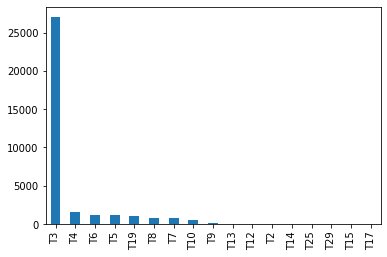

In [ ]:
application_df.APPLICATION_TYPE.value_counts().plot(kind="bar")
plt.show

In [ ]:
app_vals = application_df.APPLICATION_TYPE.value_counts()
(app_vals[app_vals < 500].index)

Index(['T9', 'T13', 'T12', 'T2', 'T14', 'T25', 'T29', 'T15', 'T17'], dtype='object')

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
app_vals = application_df.APPLICATION_TYPE.value_counts()

cutoff = 500
application_types_to_replace = list(app_vals[app_vals < cutoff].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

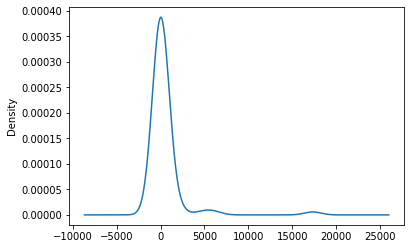

In [ ]:
application_df.CLASSIFICATION.value_counts().plot.kde()
plt.show()

In [ ]:
# Look at CLASSIFICATION value counts for binning

class_vals1=application_df["CLASSIFICATION"].value_counts()
class_vals1.head(50)



C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C4100        6
C2400        6
C1720        6
C1600        5
C1257        5
C0           3
C1260        3
C2710        3
C3200        2
C1267        2
C1234        2
C1246        2
C1256        2
C4200        1
C1900        1
C2600        1
C2500        1
C5200        1
Name: CLASSIFICATION, dtype: int64

In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_vals = application_df.CLASSIFICATION.value_counts()
class_vals[class_vals > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C4100        6
C2400        6
C1720        6
C1600        5
C1257        5
C0           3
C1260        3
C2710        3
C3200        2
C1267        2
C1234        2
C1246        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Determine which values to replace if counts are less than ..?
replace_class= class_vals[class_vals < 500].index.tolist()

# Replace in dataframe
for clase in replace_class:
    application_df.CLASSIFICATION= application_df.CLASSIFICATION.replace(clase, "Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop("IS_SUCCESSFUL", axis=1) 
y = application_df.IS_SUCCESSFUL

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
print(len(application_df.columns))

45


## Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3600      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,061
Trainable params: 6,061
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)


In [ ]:
# Train the model
fit_model= nn.fit(X_train_scaled, y_train, epochs=100, verbose=1, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5675 - accuracy: 0.7210
Epoch 2/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5536 - accuracy: 0.7294
Epoch 3/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5501 - accuracy: 0.7315
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5489 - accuracy: 0.7289
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5478 - accuracy: 0.7321
Epoch 6/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5464 - accuracy: 0.7312
Epoch 7/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5462 - accuracy: 0.7327
Epoch 8/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5453 - accuracy: 0.7324
Epoch 9/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5451 - accuracy: 0.7323
Epoch 10/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5443 - accura

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5579 - accuracy: 0.7282 - 431ms/epoch - 2ms/step
Loss: 0.5579227805137634, Accuracy: 0.7281632423400879


# attemp 2 - to achieve 75% accuracy
3 hidden layers with relu and output layer of sigmoid

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 60
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 15

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 60)                2700      
                                                                 
 dense_4 (Dense)             (None, 30)                1830      
                                                                 
 dense_5 (Dense)             (None, 15)                465       
                                                                 
 dense_6 (Dense)             (None, 1)                 16        
                                                                 
Total params: 5,011
Trainable params: 5,011
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn.fit(X_train_scaled, y_train, epochs=100, verbose=1, callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5717 - accuracy: 0.7189
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5542 - accuracy: 0.7291
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5504 - accuracy: 0.7305
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5497 - accuracy: 0.7299
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5469 - accuracy: 0.7338
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5468 - accuracy: 0.7308
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5457 - accuracy: 0.7333
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5453 - accuracy: 0.7335
Epoch 9/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5446 - accuracy: 0.7346
Epoch 10/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5443 - accura

# Attemp 3 - to achieve 75% accuracy
3 hiddend layers with sigmoid & relu

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 40
hidden_nodes_layer3 = 15

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 80)                3600      
                                                                 
 dense_8 (Dense)             (None, 40)                3240      
                                                                 
 dense_9 (Dense)             (None, 15)                615       
                                                                 
 dense_10 (Dense)            (None, 1)                 16        
                                                                 
Total params: 7,471
Trainable params: 7,471
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
# os.makedirs("checkpoints/",exist_ok=True)
# checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn.fit(X_train_scaled, y_train, epochs=100, verbose=1, callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5803 - accuracy: 0.7157
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5620 - accuracy: 0.7267
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5571 - accuracy: 0.7279
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5560 - accuracy: 0.7291
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5537 - accuracy: 0.7301
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5525 - accuracy: 0.7313
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5508 - accuracy: 0.7314
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5506 - accuracy: 0.7303
Epoch 9/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5496 - accuracy: 0.7302
Epoch 10/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5492 - accura

# Attemp 4 - to achieve 75% accuracy
1 hidden layer with relu and output of tanh

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train_scaled[10])
hidden_nodes_layer1 = 80

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 80)                3600      
                                                                 
 dense_12 (Dense)            (None, 1)                 81        
                                                                 
Total params: 3,681
Trainable params: 3,681
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
# os.makedirs("checkpoints/",exist_ok=True)
# checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn.fit(X_train_scaled, y_train, epochs=200, verbose=1, callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/200
804/804 [==============================] - 3s 3ms/step - loss: 1.4396 - accuracy: 0.6720
Epoch 2/200
804/804 [==============================] - 2s 3ms/step - loss: 1.2125 - accuracy: 0.6864
Epoch 3/200
804/804 [==============================] - 2s 3ms/step - loss: 1.2002 - accuracy: 0.6791
Epoch 4/200
804/804 [==============================] - 2s 3ms/step - loss: 0.9202 - accuracy: 0.7034
Epoch 5/200
804/804 [==============================] - 2s 3ms/step - loss: 0.8355 - accuracy: 0.7077
Epoch 6/200
804/804 [==============================] - 2s 3ms/step - loss: 0.8501 - accuracy: 0.7103
Epoch 7/200
804/804 [==============================] - 2s 3ms/step - loss: 0.8172 - accuracy: 0.7144
Epoch 8/200
804/804 [==============================] - 2s 3ms/step - loss: 0.8424 - accuracy: 0.7077
Epoch 9/200
804/804 [==============================] - 2s 3ms/step - loss: 0.8144 - accuracy: 0.7119
Epoch 10/200
804/804 [==============================] - 2s 3ms/step - loss: 0.8157 - accura

In [37]:
# Export our model to HDF5 file
nn.save("/content/drive/MyDrive/Colab/21-Deep-Learning/Instructions/AlphabetSoupCharity_Optimization.h5")